In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Ön işleme için
from sklearn.preprocessing import StandardScaler, LabelEncoder
#Sistem Kütüphaneleri
import os
import warnings
warnings.filterwarnings("ignore")
print("Uyarılar kapatıldı")

Uyarılar kapatıldı


# Verimizi inceleyelim

BAŞLAMADAN ÖNCE ŞUNU BELİRTMEK İSTERİM

Bu deneyimlerimde kendimin yazmış olduğu kod  dışında araştırma yaparak Weka adlı java tabanlı uygulamada çok fazla denemeler yaptım ve Kaggle adlı platformda yapılanları Weka uygulamasıyla birlikte karşılaştırarak incelemem bana çok fazla deneyimleme fırsatı tanıdı.Hangi verileri kullanmam gerektiğini nelere öncelikle başlamam gerektiğini gördüm.

Bu uygulamada 11 adet algoritmayı konu aldım. 




In [2]:
veriSeti=pd.read_csv("column_2C.csv")

In [3]:
veriSeti

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


Sutunlarımızı baktık

In [4]:
veriSeti.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

Nan değer varmı diye baktık

In [5]:
veriSeti.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

Verisetimizin teknik özelliklerini inceledim

In [6]:
veriSeti.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


# NOT=Veri ön işleme seçimi olarak GreadSearch gibi algoritmalar kullanacağım.

Verisetimde %25 altı veya %75 üstündeki ayrıkı verilere baktım eğer veri setimizin %10 geçicek kadar ayrıkı veri varsa alttaki
durumlardan birini yapacaktım fakat görüldüğü üzere 3 veri olduğu için dokunmak istemedim.

1-Silme
2-Ortalama 
3-Baskılama

veyada normalizyon tekniklerinden birileri uygulayabilirim fakat !!! fazla bi başarı oranı değişimi olmadı hatta bazılarında düşüş yaşadım o yüzden yeri geldiği yerde verileri ona göre şekillendirdim !!!

Veri Görselleştirmede featurelardaki bağlam için kolerasyon sayısına ve görsel olarak veriyi inceleyip önemli feature almak daha iyi veya greadsearch  algoritması gibi en iyi verileri seçen algoritmalara başvurmak daha iyidir.



In [7]:
veriSeti[(veriSeti["pelvic_incidence"] >72.877696) & (veriSeti["pelvic_tilt numeric"] >22.120395)&
         (veriSeti["lumbar_lordosis_angle"] >63.00000) & (veriSeti["sacral_slope"] >52.695888)&
         (veriSeti["pelvic_radius"] >125.467674) & (veriSeti["degree_spondylolisthesis"] >41.287352)]

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
61,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Abnormal
83,81.104100,24.794168,77.887020,56.309932,151.839857,65.214616,Abnormal
111,84.998956,29.610098,83.352194,55.388858,126.912990,71.321175,Abnormal


In [8]:
veriSeti[(veriSeti["pelvic_incidence"] <46.430294) & (veriSeti["pelvic_tilt numeric"] <10.667069)&
         (veriSeti["lumbar_lordosis_angle"] <37.000000) & (veriSeti["sacral_slope"] <33.347122)&
         (veriSeti["pelvic_radius"] <110.709196	) & (veriSeti["degree_spondylolisthesis"] <1.603727)]

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class


# VERİ GÖRSELLEŞTİRME

Görselleştirme işlemini class yapısı formatında yapmak istedim.
Class yapısı altında yapma fikri tamamıyle benim özgün düşüncemdir.

In [9]:
class veri_Gorseli():
    def __init__(self,veriSeti):
        self.veriSeti=veriSeti
        print("Veri Görseli Nesnesi çağırıldı")
    def bar_pie(self):
        fig, axarr=plt.subplots(nrows=1,ncols=2, figsize=(8,5))
        veriSeti["class"].value_counts().plot(kind="bar",ax=axarr[0])
        veriSeti["class"].value_counts().plot.pie(autopct="%1.1f%%",ax=axarr[1])
        plt.tight_layout()
        plt.show()
    def plot_categorical(self):
        categorical_feature="class"
        fig, axarr=plt.subplots(nrows=2,ncols=4, figsize=(15,10))
        features=veriSeti.columns.values[:-1]
    
        counter=0
        
        veriSeti['class'].value_counts().plot.bar(ax=axarr[0,0])
        veriSeti['class'].value_counts().plot.pie(autopct="%1.1f%%",ax=axarr[0,1])
        for i in range(2):
            for j in range(4):
                feature=features[counter]
                if (i==0 and j==0) or (i==0 and j==1):
                    continue
                else:
                    sns.swarmplot(x=categorical_feature,y=feature,
                             
                            data=veriSeti, 
                            ax=axarr[i, j])
                counter=counter+1
                if counter>=len(features):
                    break
    
        plt.tight_layout()
        plt.show()
    def Scatter_matrix(self):
        color_list = ['blue' if i=='Abnormal' else 'orange' for i in veriSeti.loc[:,"class"]]
        pd.plotting.scatter_matrix(veriSeti.loc[:, veriSeti.columns != "class"],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '0',
                                       edgecolor= "black")
        plt.show()
        
    def pairplot(self):
        sns.pairplot(veriSeti,hue="class",palette="Set2")
        plt.show()
    def correlation(self):
        corr=veriSeti.corr()
        fig, ax=plt.subplots(1,1,figsize=(12,8))
        sns.heatmap(corr,annot=True, linewidth=.5, ax=ax)
    

In [10]:
gorsel=veri_Gorseli(veriSeti)

Veri Görseli Nesnesi çağırıldı


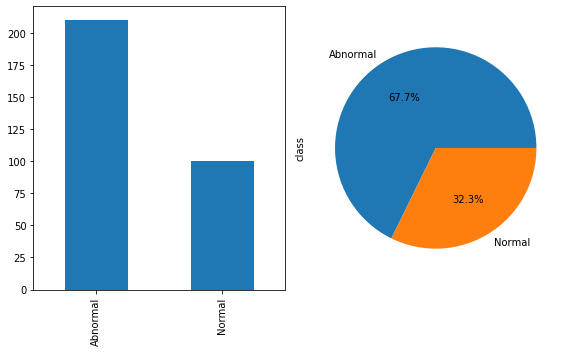

In [11]:
gorsel.bar_pie()

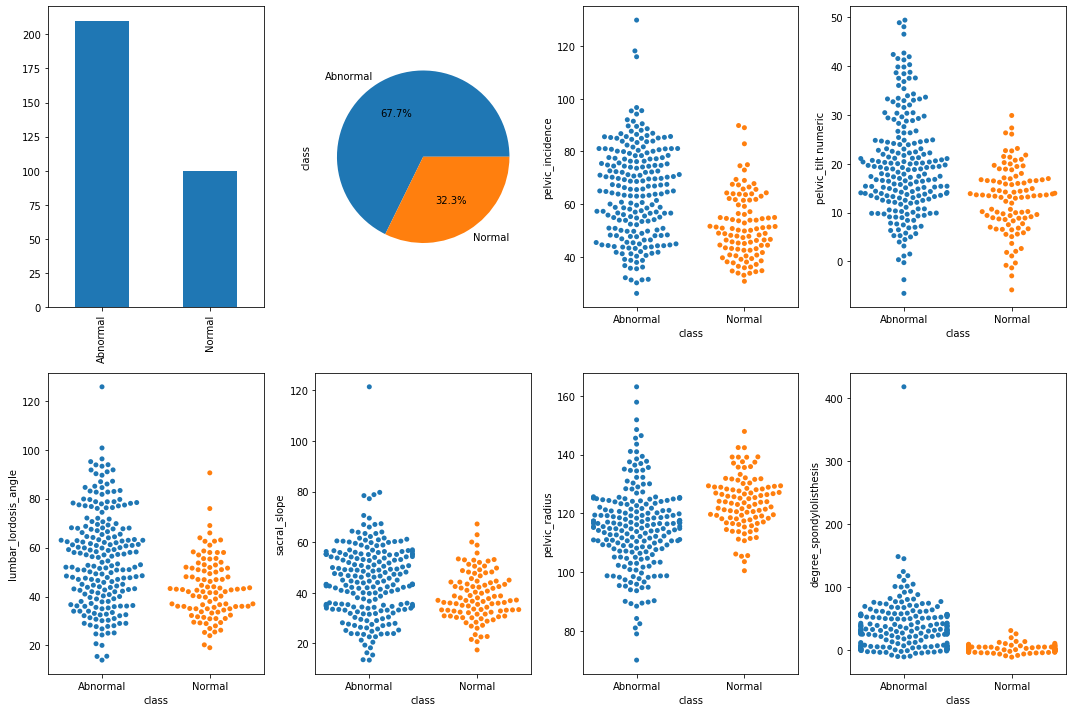

In [12]:
gorsel.plot_categorical()

In [13]:
#pandasın içindeki veri görseli

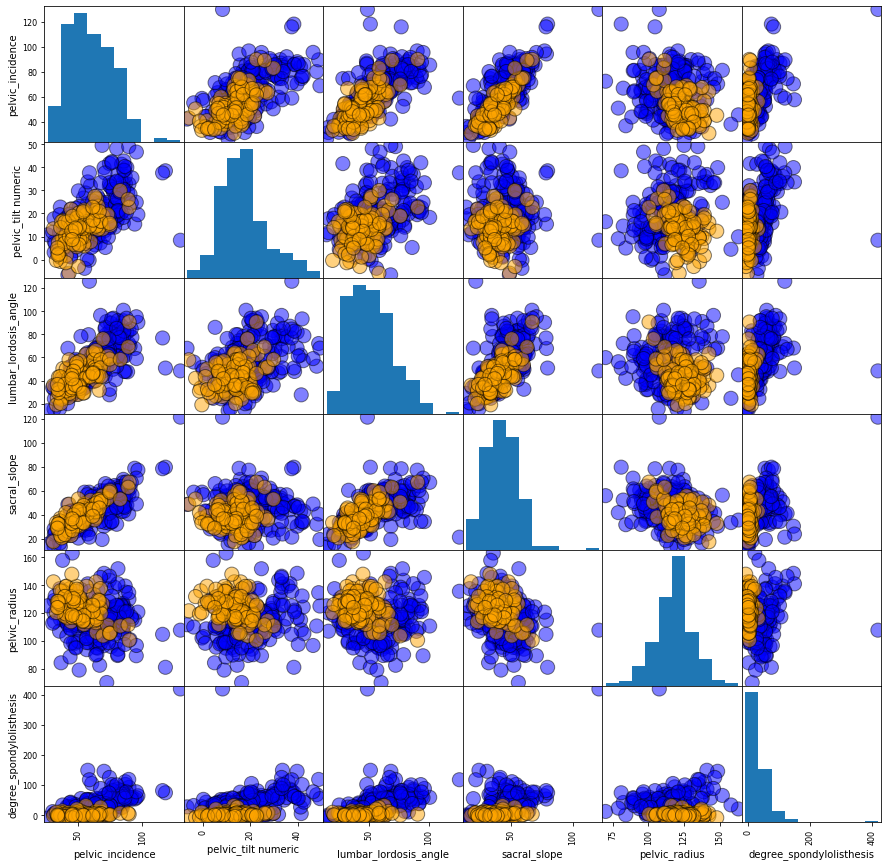

In [14]:
gorsel.Scatter_matrix()

In [15]:
#seaborn ile pairplot grafiği 

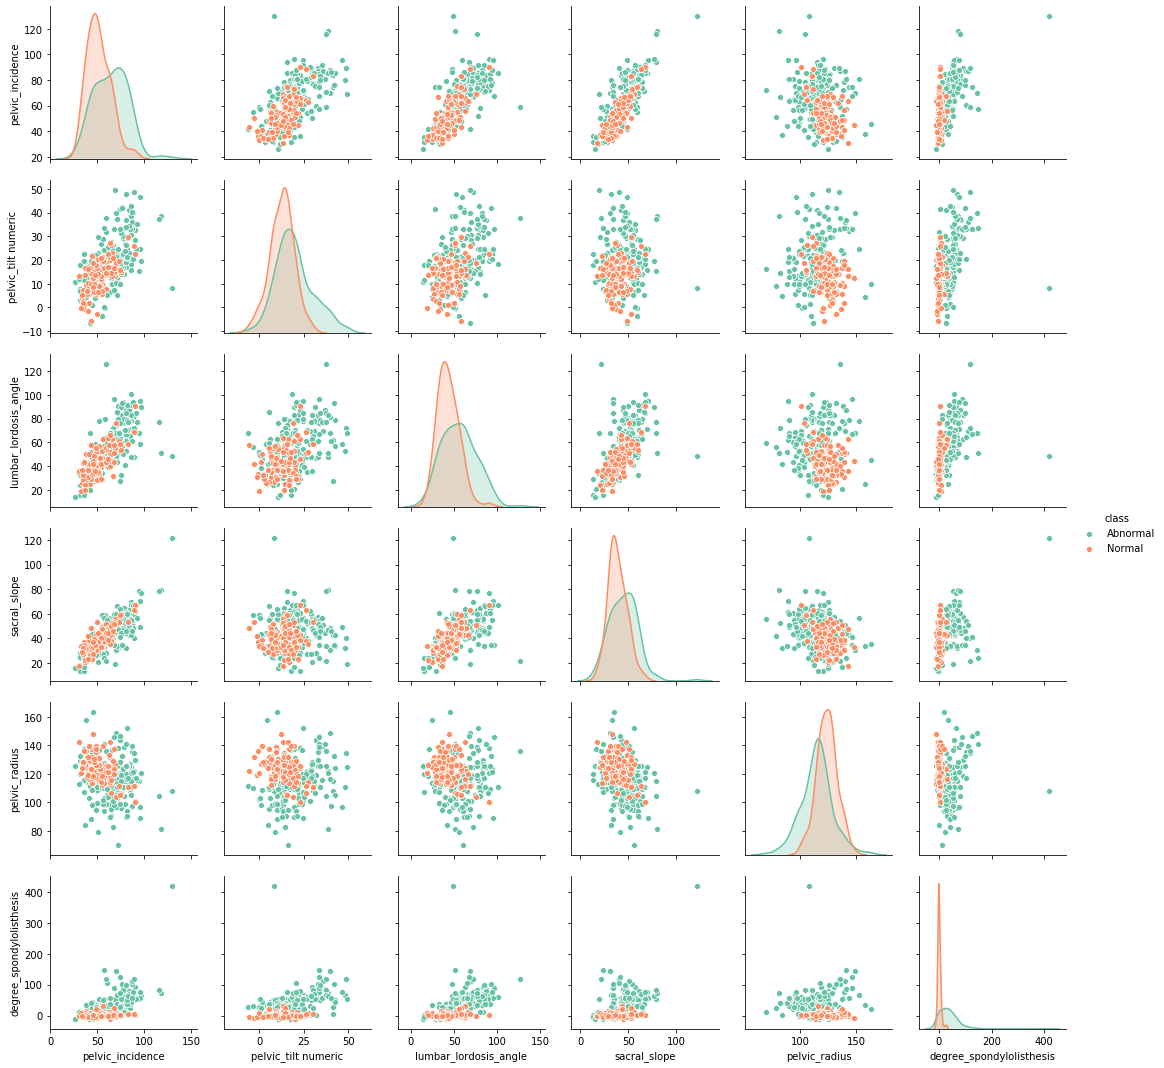

In [16]:
#VERİLEMİZİ İNCELEDİĞİMİZDE ÖNEMLİ NİTELİKLERİ GÖRÜYORUZ
gorsel.pairplot()

In [17]:
#kolerasyon feature birbirleri arasındaki bağlam 0 yakın olan ilişkiler değersizdir.
#Burada incelediğimiz sonuca göre sacral_slope ve pelvic_incidence arasında bi regresyon yapabiliriz

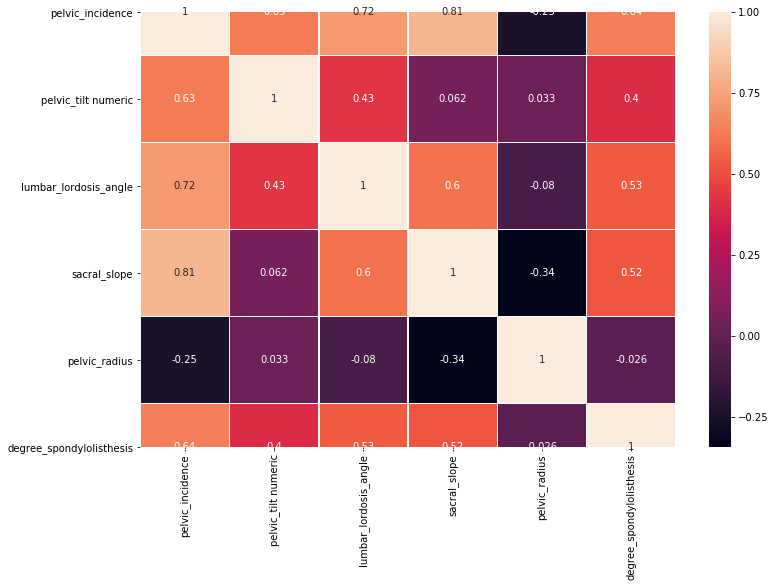

In [18]:
gorsel.correlation()

# MAKİNE ÖĞRENMESİ BAŞARI ORANI

In [19]:
#Literatürde olan Regresyon çeşitleri
#    1- Lineer Regresyon Algoritması
#    2- Multiple Linear Regresyon
#    3- Polinominal Lineer Regresyon
#    4- Karar Ağacı(Decision Tree) Regresyonu
#    5- Random Forest Regresyonu
#Bu ödevde sadece REGRESYON KISMINDA 2ne yer vereceğim 
#    LinearRegression,RandomForestRegressor

In [20]:
#REGRESYON

In [21]:
from sklearn.model_selection import train_test_split
#bunun için en iyi featureların kolerasyon sayısına göre sacral_slope ve pelvic_incidence arasında bi regresyon yapabiliriz
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# REGRESYON İÇİN 2 FEATURE BAKTIM KOLERASYON SAYISI 0.81 OLDUĞU İÇİN sacral_slope ve pelvic_incidence seçtim


kendim incelemek istediğim için test kısmını kendim yazdım x_train min sayısından başla max sayısına kadar +1 artırarak test
dizisi oluştur

In [22]:
x_train = veriSeti.pelvic_incidence.values.reshape(-1,1)  
y_train = veriSeti.sacral_slope.values.reshape(-1,1)
x_test = np.arange(min(x_train),max(x_train)).reshape(-1,1)   

<Figure size 432x288 with 0 Axes>

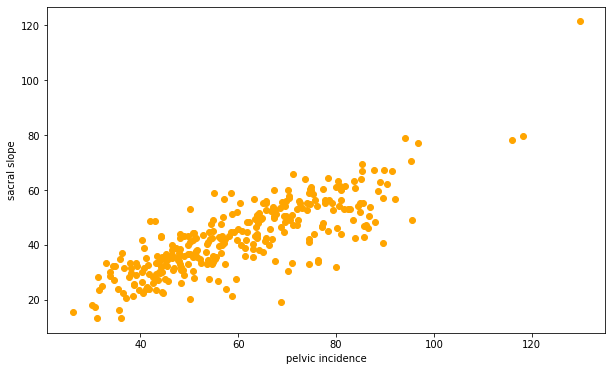

In [23]:
plt.clf()
plt.figure(figsize=(10,6))
plt.scatter(x_train,y_train,c="orange")
plt.xlabel("pelvic incidence")
plt.ylabel("sacral slope")
plt.show()  

In [24]:

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
lr_y_head = lr_model.predict(x_test)
lr_y_head_real = lr_model.predict(x_train)

In [25]:
print("score of linear regressor:", r2_score(y_train,lr_y_head_real))

score of linear regressor: 0.664159783972475


In [26]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=128,random_state=42)
rf_model.fit(x_train,y_train)
rf_y_head = rf_model.predict(x_test)
rf_y_head_real = rf_model.predict(x_train)

In [27]:
print("score of randomforest regressor:",    r2_score(y_train,rf_y_head_real))

score of randomforest regressor: 0.9266378475240452


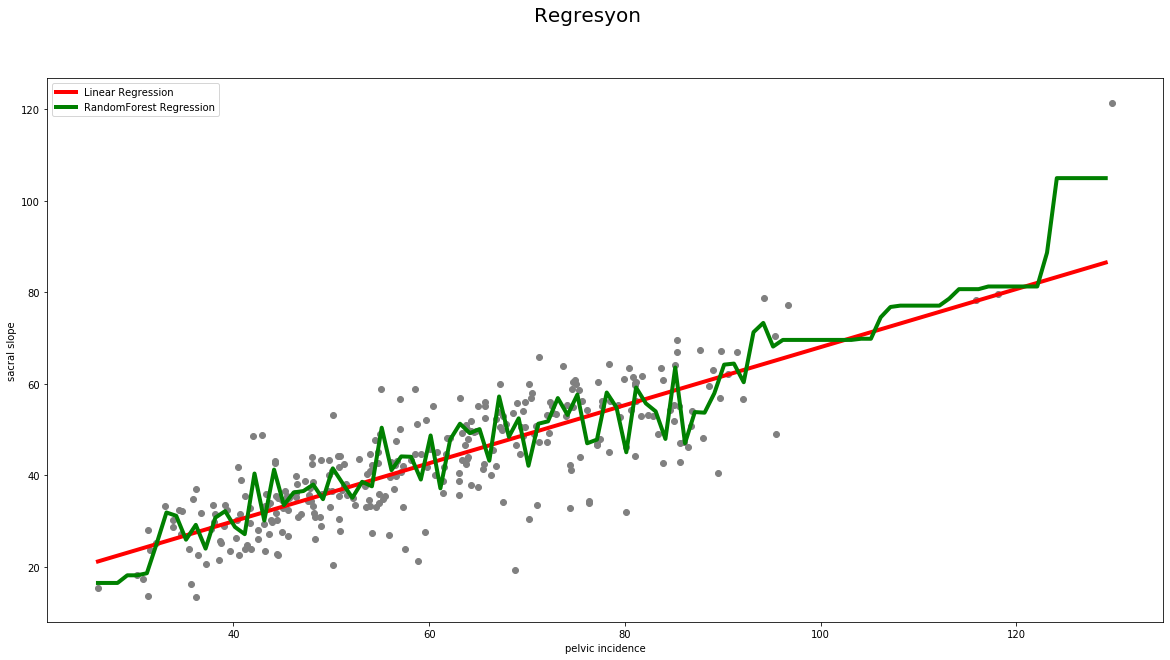

In [28]:
plt.figure(figsize=(20,10))
plt.scatter(x_train,y_train,c="gray")
plt.xlabel("pelvic incidence")
plt.ylabel("sacral slope")
plt.plot(x_test,lr_y_head,c="red",label="Linear Regression",linewidth=4)
plt.plot(x_test,rf_y_head,c="green",label="RandomForest Regression",linewidth=4)

plt.legend()
plt.suptitle("Regresyon",fontsize=20)
plt.show()   

In [29]:
#güzel sonuçlar elde ettiğimi gördüm

# TRAİN TEST KISMI
# BAŞARI ORANLARI DÜŞÜYOR DİYE HANGİ ALGORİTMADA DAHA BAŞARILI NASIL VERİ MODELLEMESİ YAPILIYOR DİYE AYRI ŞEKİLLERDE VERİMİ MODELLEDİM


In [30]:
#2 FARKLI VERİ MODELLEMESİ YAPTIM HANGİSİNDE DAHA BAŞARILIYSA ONLARI GRUPLANDIRARAK YAPARAK KODLARIMI ONA GÖRE DERLEDİM
#Öncelikle verimi güzel bir hale getirdim
#Literatür göre test %33 random state 1 veya 42 alarak işlem devam ettim. Ben 1 aldım Sizde derlediğinizde sonuçlar değişmesin

In [31]:
x,y = veriSeti.loc[:,veriSeti.columns != 'class'], veriSeti.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 1)

In [32]:
#verilerimi daha yüksek sonuçlar vermesi için verisetimle her algoritma için farklı ayarlar yaptım

In [33]:
#KNN algoritması
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 100 komşu kadar bakmak istedim
neig = np.arange(1, 100)
train_accuracy = []
test_accuracy = []
for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))


In [34]:
#KNN ÇOK GÜZEL Bİ BAŞARI ORANI ETTİM BENCE

In [35]:
print("En yüksek başarı oranı {} \nK-Komşu sayısı= {} bağlı olarak ".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

En yüksek başarı oranı 0.8932038834951457 
K-Komşu sayısı= 18 bağlı olarak 


In [36]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_test_log = round(logreg.score(x_test, y_test) ,4)
acc_test_log

0.8835

In [37]:
#burda veri değiştirdim çunku BAŞARI ORAN DÜŞÜYORDU
#encoder ve tranform yaptım

In [38]:
x,y = veriSeti.loc[:,veriSeti.columns != 'class'], veriSeti.loc[:,'class']
x=StandardScaler().fit_transform(x)
labelEncoder=LabelEncoder()
y=labelEncoder.fit_transform(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 1)

In [39]:
#Support Vector Machines 
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
acc_test_svc = round(svc.score(x_test, y_test) , 4)
acc_test_svc

0.8544

In [40]:
#Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(dual=False)  
linear_svc.fit(x_train, y_train)
acc_test_linear_svc = round(linear_svc.score(x_test, y_test) , 4)
acc_test_linear_svc

0.8835

In [41]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
acc_test_gaussian = round(gaussian.score(x_test, y_test) , 5)
acc_test_gaussian

0.83495

In [42]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
acc_test_decision_tree = round(decision_tree.score(x_test, y_test) , 5)
acc_test_decision_tree

0.80583

In [43]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
acc_test_sgd = round(sgd.score(x_test, y_test) , 4)
acc_test_sgd

0.8738

In [44]:
# Lasso
from sklearn.linear_model import Lasso
x = np.array(veriSeti.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
y = np.array(veriSeti.loc[:,'sacral_slope']).reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print(lasso.score(x_test,y_test))


0.9475131762267749


In [45]:
from sklearn.model_selection import GridSearchCV
target_name="class"
X=veriSeti.drop(target_name, axis=1)
y=veriSeti[target_name]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)
best_score=0
gammas=[0.001, 0.01, 0.1, 1, 10, 100]
Cs=[0.001, 0.01, 0.1, 1, 10, 100]
kernels=['rbf', 'linear']
    
for gamma in gammas:
    for C in Cs:
        for kernel in kernels:
            svm=SVC(kernel=kernel,gamma=gamma, C=C)
            svm.fit(X_train, y_train)
            score=svm.score(X_test, y_test)

            if score>best_score:
                y_pred=svm.predict(X_test)
                best_score=score
                best_params={'kernel':kernel, 'C':C, 'gamma':gamma}
        
print("best score:",best_score)
    

best score: 0.9032258064516129


# SONUÇ OLARAK İNCELEDİĞİMDE EN BAŞARILI ALGORİTMALAR

İncelediğimiz sonuçlara abnormal ve normal sınıflandırılmasında Regresyon yapmak başarılı bir sonuç verir 

En başarılı algoritma:
Lasso başarı oranı = 0.9475
GridSearch kullanarak SVC başarı oranı = 0.9032
KNN algoritması = 0.8932

en kötü sonuç veren Regresyon Modeli:
Linear Regresyon başarı oranı= 0.6641

Tüm feature alarak başarı gösteren en iyi algoritmalar :
GridSearch ile SVC başarı oranı = 0.9032


hocam en az 5 defa kodları sil baştan farklı modeller deniye deniye yaptım umarım beğenirsiniz.
Class yapısı altında başta hepsini topladım fakat bazı sorunlar aldığım için 0 dan tekrar sil baştan yapma durumunda kaldım